In [151]:
import pandas as pd  
import kagglehub
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
path = kagglehub.dataset_download("himelsarder/road-accident-survival-dataset")
print("Path to dataset files:", path)
file_path = f"{path}/accident.csv" 

Path to dataset files: C:\Users\gsocc\.cache\kagglehub\datasets\himelsarder\road-accident-survival-dataset\versions\1


In [142]:
df = pd.read_csv(file_path)

df_cleaned = df.dropna()
df_cleaned.to_csv(f"{path}/cleaned_dataset.csv", index=False)
print(df_cleaned.head())

   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


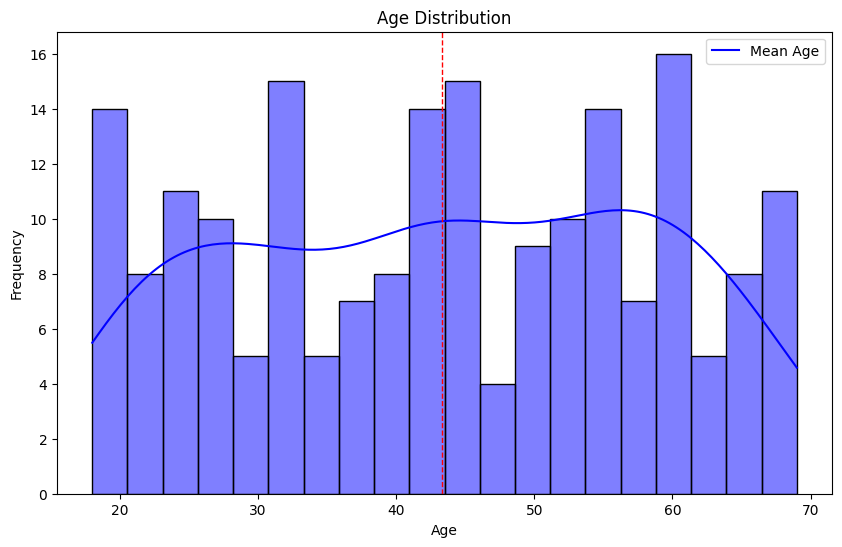

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df_cleaned['Age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend({'Mean Age': df_cleaned['Age'].mean()})
plt.show()

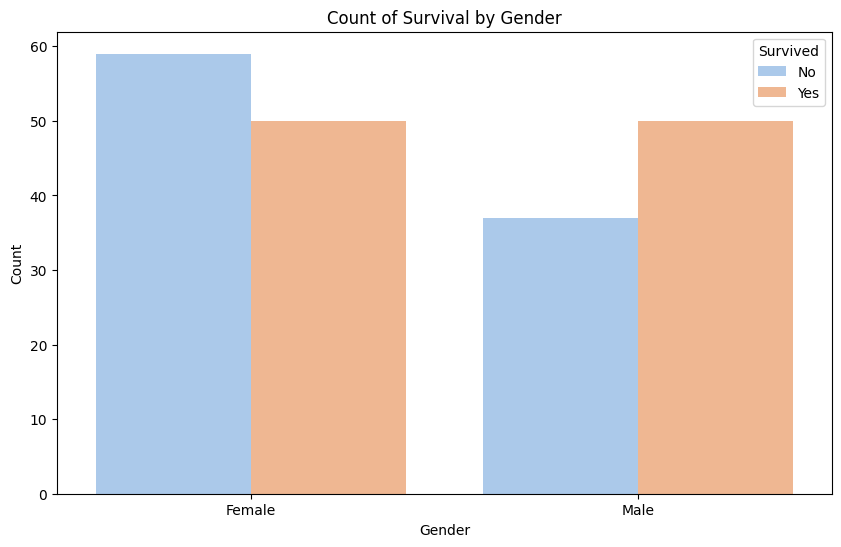

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Gender', hue='Survived', palette='pastel')
plt.title('Count of Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\gsocc\AppData\Local\Temp\ipykernel_17796\117830982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Helmet_Used', y='Survived', palette='muted')


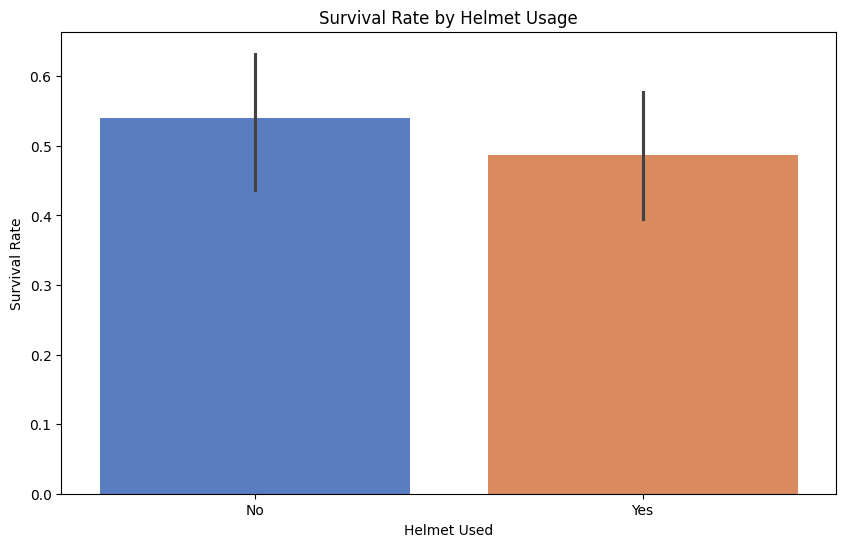

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='Helmet_Used', y='Survived', palette='muted')
plt.title('Survival Rate by Helmet Usage')
plt.xlabel('Helmet Used')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\gsocc\AppData\Local\Temp\ipykernel_17796\876995664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Seatbelt_Used', y='Survived', palette='muted')


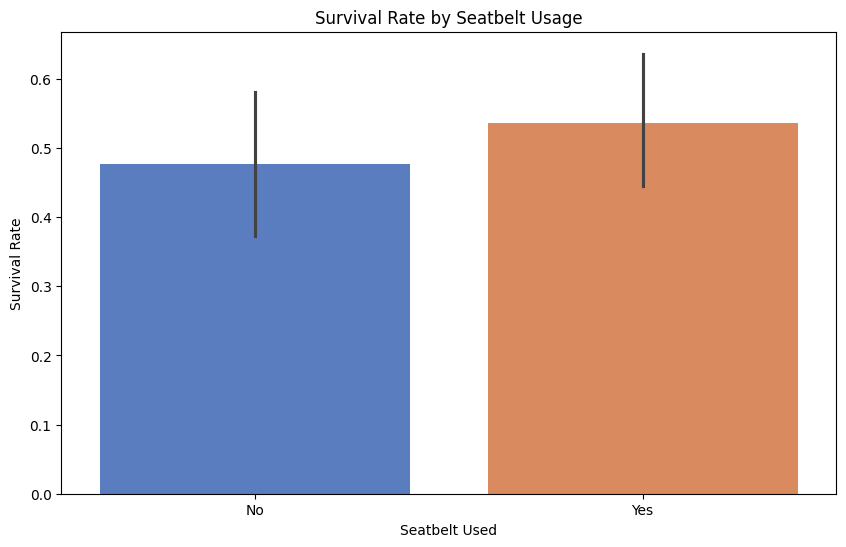

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='Seatbelt_Used', y='Survived', palette='muted')
plt.title('Survival Rate by Seatbelt Usage')
plt.xlabel('Seatbelt Used')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\gsocc\AppData\Local\Temp\ipykernel_17796\4202850052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)
C:\Users\gsocc\AppData\Local\Temp\ipykernel_17796\4202850052.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df_cleaned.groupby(['Age Group', 'Survived']).size().unstack(fill_value=0)


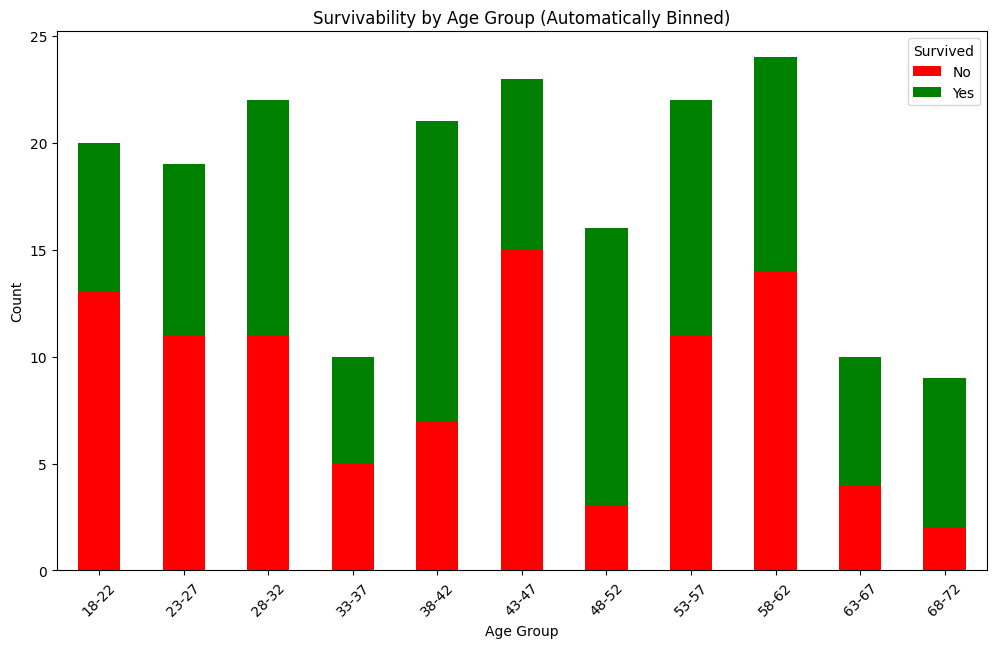

In [166]:
bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73] 
labels = [f'{i}-{i + 4}' for i in bins[:-1]]

df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

age_survival_counts = df_cleaned.groupby(['Age Group', 'Survived']).size().unstack(fill_value=0)

age_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 7))
plt.title('Survivability by Age Group (Automatically Binned)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [143]:
label_encoders = {}
categorical_columns = ["Gender", "Helmet_Used", "Seatbelt_Used"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

X = df[["Age", "Gender", "Speed_of_Impact", "Helmet_Used", "Seatbelt_Used"]]
y = df["Survived"] 

X = X.dropna()
y = y.loc[X.index]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

svm_train_pred = svm_model.predict(X_train_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [146]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=33)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

In [147]:
print("\n--- Model Performance ---")
print(f"SVM Training Accuracy: {svm_train_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")
print(f"Random Forest Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")


--- Model Performance ---
SVM Training Accuracy: 0.6943
SVM Test Accuracy: 0.5250
Random Forest Training Accuracy: 0.7834
Random Forest Test Accuracy: 0.5750


In [148]:
svm_feature_importance = pd.Series(abs(svm_linear.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\n--- SVM Feature Importance (Linear Kernel) ---")
print(svm_feature_importance)


--- SVM Feature Importance (Linear Kernel) ---
Age                0.552782
Gender             0.255076
Speed_of_Impact    0.071982
Seatbelt_Used      0.030172
Helmet_Used        0.015748
dtype: float64


In [149]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- Feature Importance (Random Forest) ---")
print(feature_importance)


--- Feature Importance (Random Forest) ---
Age                0.395060
Speed_of_Impact    0.345266
Seatbelt_Used      0.100078
Helmet_Used        0.084496
Gender             0.075099
dtype: float64


In [150]:
print("\n--- SVM Classification Report ---")
print(classification_report(y_test, svm_test_pred))

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_test_pred))


--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        24
           1       0.43      0.62      0.51        16

    accuracy                           0.53        40
   macro avg       0.54      0.54      0.52        40
weighted avg       0.56      0.53      0.53        40


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        24
           1       0.48      0.69      0.56        16

    accuracy                           0.57        40
   macro avg       0.59      0.59      0.57        40
weighted avg       0.61      0.57      0.58        40

